In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import math
import tensorflow_datasets as tfds

In [2]:
dataset,metadata=tfds.load('fashion_mnist', as_supervised=True, with_info=True)
train,test=dataset['train'],dataset['test']

In [3]:
names=['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal',      'Shirt',   'Sneaker',  'Bag',   'Ankle boot']

In [4]:
print(f"No. of training eg = {metadata.splits['train'].num_examples}")
print(f"No. of testing eg = {metadata.splits['test'].num_examples}")

No. of training eg = 60000
No. of testing eg = 10000


### Normalization
[0-255] to [0-1]

In [5]:
def normalize(images,labels):
    images=tf.cast(images,tf.float32)
    images/=255
    return images,labels

In [6]:
train=train.map(normalize)
test=test.map(normalize)

In [7]:
train=train.cache()
test=test.cache()

### Explore dataset

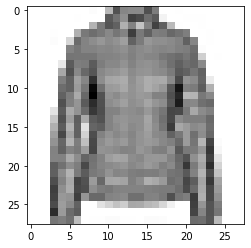

In [8]:
for image,label in test.take(1):
    break
image=image.numpy().reshape((28,28))

plt.imshow(image,cmap=plt.cm.binary)
# plt.colorbar()
# plt.grid=False
plt.show()

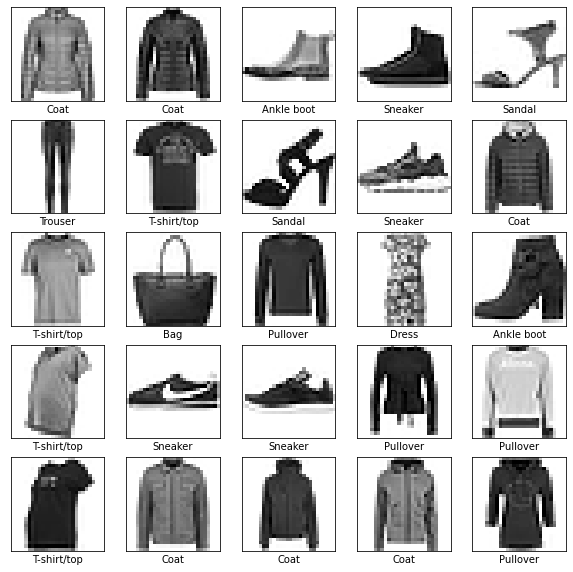

In [9]:
plt.figure(figsize=(10,10))
i=0
for (image,label) in test.take(25):
    image=image.numpy().reshape((28,28))
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(image,cmap=plt.cm.binary)
    plt.xlabel(names[label])
    i+=1
plt.show()    

### Model

In [10]:
model=tf.keras.Sequential([
    tf.keras.layers.Conv2D(32,(3,3),padding='same', activation=tf.nn.relu,
                          input_shape=(28,28,1)),
    tf.keras.layers.MaxPooling2D((2,2),strides=2),
    tf.keras.layers.Conv2D(64,(3,3),padding='same',activation=tf.nn.relu),
    tf.keras.layers.MaxPooling2D((2,2),strides=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128,activation=tf.nn.relu),
    tf.keras.layers.Dense(10,activation=tf.nn.softmax)
])

In [12]:
model.compile(optimizer='adam',
             loss=tf.keras.losses.SparseCategoricalCrossentropy(),
             metrics=['accuracy'])

In [14]:
num_train=metadata.splits['train'].num_examples
num_test=metadata.splits['test'].num_examples

In [15]:
train=train.cache().repeat().shuffle(num_train).batch(32)
test=test.cache().batch(32)

In [16]:
model.fit(train,epochs=10,steps_per_epoch=math.ceil(num_train/32))

Epoch 1/10
1875/1875 [==============================] - 47s 25ms/step - loss: 0.3931 - accuracy: 0.8579
Epoch 2/10
1875/1875 [==============================] - 47s 25ms/step - loss: 0.2596 - accuracy: 0.9055
Epoch 3/10
1875/1875 [==============================] - 51s 27ms/step - loss: 0.2060 - accuracy: 0.9242
Epoch 4/10
1875/1875 [==============================] - 51s 27ms/step - loss: 0.1779 - accuracy: 0.9351
Epoch 5/10
1875/1875 [==============================] - 50s 27ms/step - loss: 0.1522 - accuracy: 0.9437
Epoch 6/10
1875/1875 [==============================] - 47s 25ms/step - loss: 0.1309 - accuracy: 0.95120s - loss: 0.1309 - accura
Epoch 7/10
1875/1875 [==============================] - 46s 25ms/step - loss: 0.1111 - accuracy: 0.9585
Epoch 8/10
1875/1875 [==============================] - 45s 24ms/step - loss: 0.0922 - accuracy: 0.9658
Epoch 9/10
1875/1875 [==============================] - 46s 24ms/step - loss: 0.0802 - accuracy: 0.9700
Epoch 10/10
1875/1875 [===============

In [18]:
test_loss,test_accuracy=model.evaluate(test,steps=math.ceil(num_test/32))
print("Accuracy= ",test_accuracy)

313/313 [==============================] - 2s 5ms/step - loss: 0.3078 - accuracy: 0.9218
Accuracy=  0.9218000173568726


In [19]:
for test_images, test_labels in test.take(1):
  test_images = test_images.numpy()
  test_labels = test_labels.numpy()
  predictions = model.predict(test_images)

In [20]:
predictions.shape

(32, 10)

In [21]:
predictions[0]

array([6.3955135e-08, 4.2013636e-13, 8.3580456e-04, 1.6950010e-12,
       9.9383402e-01, 3.2103528e-14, 5.3301495e-03, 3.8153854e-14,
       6.7089567e-10, 7.6417866e-10], dtype=float32)

In [23]:
print(np.argmax(predictions[0]))
print(names[np.argmax(predictions[0])])

4
Coat


In [26]:
print(test_labels[0])
print(names[test_labels[0]])

4
Coat


In [29]:
def plot_image(i, predictions_array, true_labels, images):
  predictions_array, true_label, img = predictions_array[i], true_labels[i], images[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img[...,0], cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(names[predicted_label],
                                100*np.max(predictions_array),
                                names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)
  
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

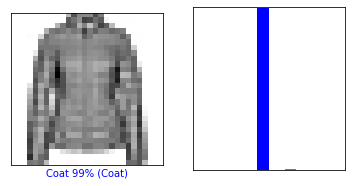

In [30]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)

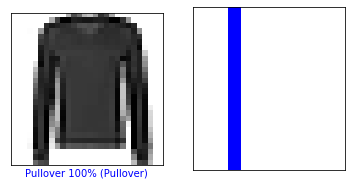

In [31]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)

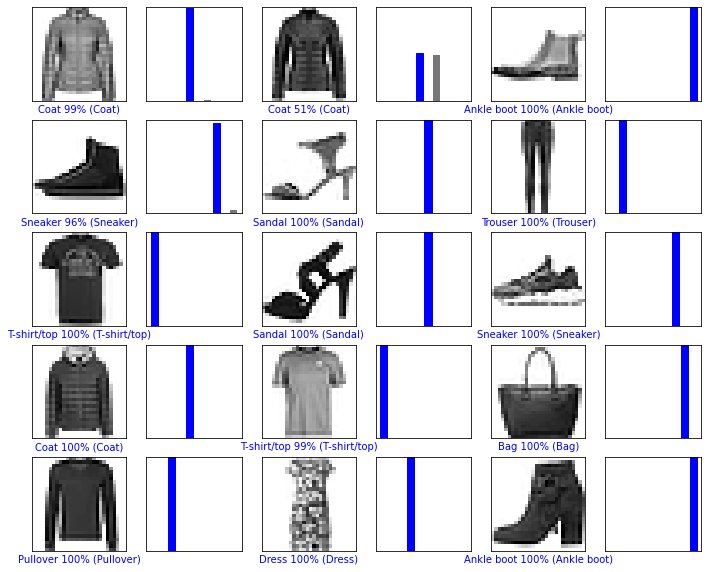

In [32]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)


In [34]:
img = test_images[0]
print(img.shape)

img = np.array([img])
print(img.shape)

predictions_single = model.predict(img)
print(predictions_single)

(28, 28, 1)
(1, 28, 28, 1)
[[6.3955255e-08 4.2013636e-13 8.3580456e-04 1.6949946e-12 9.9383402e-01
  3.2103528e-14 5.3301575e-03 3.8153854e-14 6.7089695e-10 7.6417866e-10]]


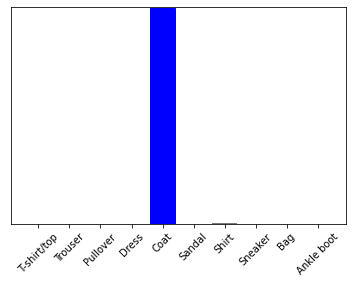

In [36]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), names, rotation=45)

In [37]:
np.argmax(predictions_single[0])

4